In [4]:

from config import INTERM_DIR
import pickle
import matplotlib.pyplot as plt
import torch
import scienceplots

with open(INTERM_DIR / 'label_encoders.pkl', 'rb') as f:
    le = pickle.load(f) 

In [22]:
def plot_metrics(pickle_filepath):
    with open(pickle_filepath, 'rb') as f:
        metrics = pickle.load(f)

    softmask_metrics = [m for m in metrics.keys() if 'softmask' in m]
    for sm in softmask_metrics:
        fp, fn, c = metrics[sm]
        print(sm)
        print(f'\tfid+: {fp:.3f}')
        print(f'\tfid-: {fn:.3f}')
        print(f'\tchar: {c:.3f}')

    # plot sparsity curves
    print('plotting')
    with plt.style.context("science"):
        for metric in ("fid-", "fid+", "c"):
            print(metric)
            for attack in le["Attack"].classes_:
                if attack == "Benign":
                    continue

                m = metrics[f"{attack} sparsity curve"]
                plt.plot(m["s"], m[metric])
                
            plt.title({
                'fid-': 'Fidelity-',
                'fid+': 'Fidelity+',
                'c': 'Characterization'
            }[metric])
            plt.legend(le["Attack"].classes_[1:])
            plt.show()
            
    return metrics

### GNNEA

In [ ]:
metrics = plot_metrics('../interm/gnne_adapted_metrics.pkl')

with plt.style.context("science"):
	for m, l in metrics['epoch metrics'] .items():
		if type(l[0]) is torch.Tensor:
			plt.plot([ll.detach().numpy() for ll in l])
		else:
			plt.plot(l)

	plt.legend(metrics['epoch metrics'] .keys())
	plt.savefig(f'../figures/gnne_adapted/epoch_metrics.png')
	plt.clf()

### Baselines

/home/taznk/COMP4003/venv/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


DDoS softmask metrics
	fid+: 0.514
	fid-: 0.277
	char: 0.601
DoS softmask metrics
	fid+: 0.389
	fid-: 0.197
	char: 0.525
Reconnaissance softmask metrics
	fid+: 0.009
	fid-: 0.018
	char: 0.018
Theft softmask metrics
	fid+: 0.082
	fid-: 0.010
	char: 0.151
plotting
fid-


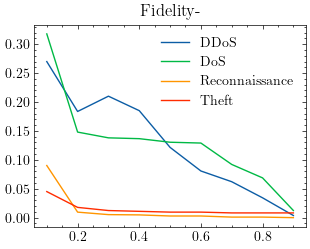

fid+


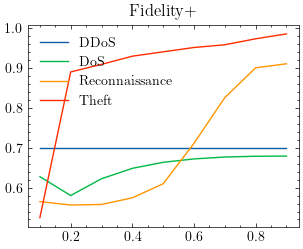

c


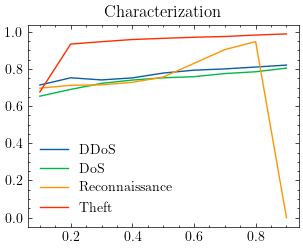

In [23]:
gnne_metrics = plot_metrics('../../interm/gnne_metrics.pickle')